In [1]:
'! pip3 install pandas pycoingecko matplotlib scipy seaborn
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import datetime as dt
import time
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
from pycoingecko import CoinGeckoAPI
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
from pandas.plotting import lag_plot'
cg = CoinGeckoAPI()

In [2]:
tweet_date = "2018-07-18 01:58:00"
coin='dogecoin'
date_format = "%Y-%m-%d %H:%M:%S"
#1 day from current time will produce 5min interval
#1-90 hourly interval
#above 90 days is daily
number_of_days = 45
number_of_hours = 0
tweet_datetime = pd.to_datetime(tweet_date,format=date_format)
tweet_from_timestamp = (tweet_datetime - dt.timedelta(days=number_of_days,hours=number_of_hours)).timestamp()
tweet_to_timestamp = (tweet_datetime + dt.timedelta(days=number_of_days,hours=number_of_hours)).timestamp()

In [3]:
coin_gecko_data = cg.get_coin_market_chart_range_by_id(id=coin,
                                                vs_currency='usd',
                                                from_timestamp=tweet_from_timestamp,
                                                to_timestamp=tweet_to_timestamp)

In [4]:
def get_nth_element():
    return l[1]
parsed_data = {}
timestamps=list(map(lambda x:x[0],coin_gecko_data['prices']))
for key in coin_gecko_data.keys():
    parsed_data[key] = list(map(lambda x:x[1], coin_gecko_data[key]))
parsed_data['timestamps']=timestamps

In [5]:
df=pd.DataFrame(parsed_data)

In [6]:
df

,prices,market_caps,total_volumes,timestamps
0,0.003536,4.055510e+08,4.630466e+06,1527994004375
1,0.003537,4.056969e+08,4.647641e+06,1527997602273
2,0.003545,4.066036e+08,3.931993e+06,1528001218261
3,0.003531,4.050303e+08,3.953584e+06,1528004802445
4,0.003599,4.127919e+08,4.105703e+06,1528008405184
...,...,...,...,...
2242,0.004353,5.045204e+08,9.432780e+07,1535752613499
2243,0.004681,5.441599e+08,1.103172e+08,1535756208582
2244,0.004888,5.665088e+08,1.244128e+08,1535759822095
2245,0.004526,5.248419e+08,1.259893e+08,1535763418165


In [7]:
df['timestamps'].head()

0    1527994004375
1    1527997602273
2    1528001218261
3    1528004802445
4    1528008405184
Name: timestamps, dtype: int64

In [8]:
df['date']=pd.to_datetime(df['timestamps'],origin='unix',unit='ms')

In [52]:
df[['prices','market_caps','total_volumes','timestamps','date']].to_csv('./dogecoin_usd_elon.csv',index=False)

In [10]:
def is_after_tweet(tweet_dt):
    def i_a_t(date):
        if date < tweet_dt:
            return 0
        elif date > tweet_dt: 
            return 1
        else:
            pass
    return i_a_t

In [11]:
is_after_mapper = is_after_tweet(tweet_datetime)
df['before_after']=df['date'].map(is_after_mapper)

In [12]:
def gen_days_since(tweet_dt):
    def generate(date):
        diff = date - tweet_dt
        return  diff.days + (diff.seconds / (3600 * 24))
    return generate

In [13]:
mapper = gen_days_since(tweet_datetime)
df['days_since_tweet']=df['date'].map(mapper)

In [14]:
df

,prices,market_caps,total_volumes,timestamps,date,before_after,days_since_tweet
0,0.003536,4.055510e+08,4.630466e+06,1527994004375,2018-06-03 02:46:44.375,0,-44.966157
1,0.003537,4.056969e+08,4.647641e+06,1527997602273,2018-06-03 03:46:42.273,0,-44.924514
2,0.003545,4.066036e+08,3.931993e+06,1528001218261,2018-06-03 04:46:58.261,0,-44.882662
3,0.003531,4.050303e+08,3.953584e+06,1528004802445,2018-06-03 05:46:42.445,0,-44.841181
4,0.003599,4.127919e+08,4.105703e+06,1528008405184,2018-06-03 06:46:45.184,0,-44.799479
...,...,...,...,...,...,...,...
2242,0.004353,5.045204e+08,9.432780e+07,1535752613499,2018-08-31 21:56:53.499,1,44.832558
2243,0.004681,5.441599e+08,1.103172e+08,1535756208582,2018-08-31 22:56:48.582,1,44.874167
2244,0.004888,5.665088e+08,1.244128e+08,1535759822095,2018-08-31 23:57:02.095,1,44.915995
2245,0.004526,5.248419e+08,1.259893e+08,1535763418165,2018-09-01 00:56:58.165,1,44.957616


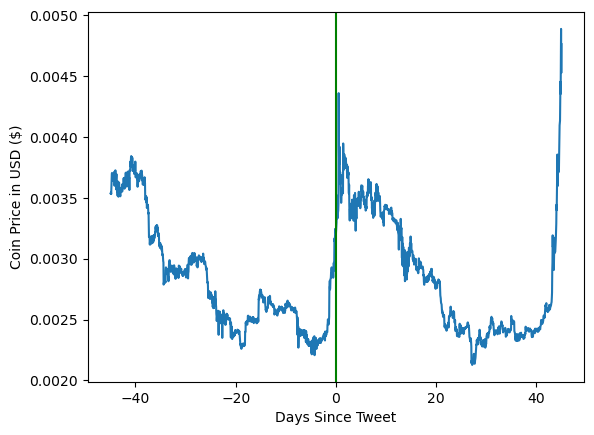

In [15]:
df.plot(x='days_since_tweet',y='prices',legend=False,ylabel='Coin Price in USD ($)',xlabel='Days Since Tweet')
plt.axvline(0,color='green')

In [16]:
max_price =max(df['prices'])

In [17]:
min_price = min(df['prices'])

In [53]:
df['date']

0      2018-06-03 02:46:44.375
1      2018-06-03 03:46:42.273
2      2018-06-03 04:46:58.261
3      2018-06-03 05:46:42.445
4      2018-06-03 06:46:45.184
                 ...          
2242   2018-08-31 21:56:53.499
2243   2018-08-31 22:56:48.582
2244   2018-08-31 23:57:02.095
2245   2018-09-01 00:56:58.165
2246   2018-09-01 01:57:04.246
Name: date, Length: 2247, dtype: datetime64[ns]

In [18]:
def min_max(price):
    return (price - min_price)/(max_price-min_price)

In [19]:
df['min_max_prices']=df['prices'].map(min_max)

In [48]:
df

,prices,market_caps,total_volumes,timestamps,date,before_after,days_since_tweet,min_max_prices
0,0.003536,4.055510e+08,4.630466e+06,1527994004375,2018-06-03 02:46:44.375,0,-44.966157,0.510243
1,0.003537,4.056969e+08,4.647641e+06,1527997602273,2018-06-03 03:46:42.273,0,-44.924514,0.510704
2,0.003545,4.066036e+08,3.931993e+06,1528001218261,2018-06-03 04:46:58.261,0,-44.882662,0.513567
3,0.003531,4.050303e+08,3.953584e+06,1528004802445,2018-06-03 05:46:42.445,0,-44.841181,0.508599
4,0.003599,4.127919e+08,4.105703e+06,1528008405184,2018-06-03 06:46:45.184,0,-44.799479,0.533107
...,...,...,...,...,...,...,...,...
2242,0.004353,5.045204e+08,9.432780e+07,1535752613499,2018-08-31 21:56:53.499,1,44.832558,0.806386
2243,0.004681,5.441599e+08,1.103172e+08,1535756208582,2018-08-31 22:56:48.582,1,44.874167,0.925052
2244,0.004888,5.665088e+08,1.244128e+08,1535759822095,2018-08-31 23:57:02.095,1,44.915995,1.000000
2245,0.004526,5.248419e+08,1.259893e+08,1535763418165,2018-09-01 00:56:58.165,1,44.957616,0.868973


In [21]:
interval_size = 7
sub_interval_df = df[(df['days_since_tweet'] > -interval_size) & (df['days_since_tweet'] < interval_size)].reset_index(drop=True)

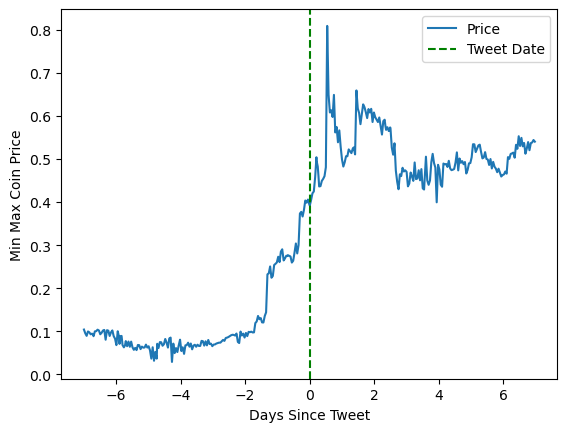

In [22]:
sub_interval_df.plot(x='days_since_tweet',y='min_max_prices',legend=False,ylabel='Min Max Coin Price',xlabel='Days Since Tweet')
plt.axvline(0,color='green',linestyle='--')
plt.legend(('Price','Tweet Date'))

[Text(1, 0, 'Coin Prices After Tweet')]

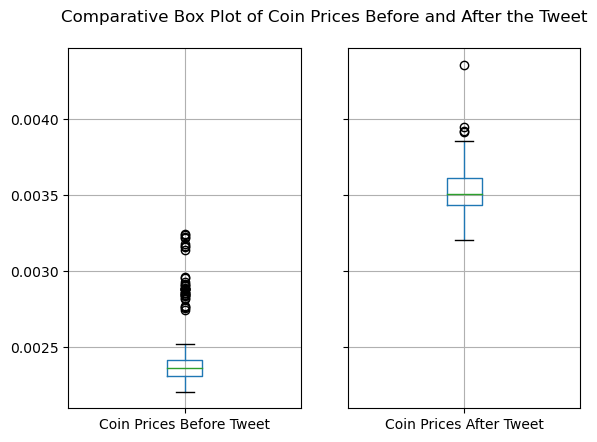

In [23]:
axes=sub_interval_df.groupby(by='before_after').boxplot(column='prices',subplots=True)
axes[0].set_title('')
axes[1].set_title('')
plt.suptitle('Comparative Box Plot of Coin Prices Before and After the Tweet')
axes[0].set_xticklabels(['Coin Prices Before Tweet'])
axes[1].set_xticklabels(['Coin Prices After Tweet'])

In [24]:
df.groupby(by='before_after')['prices'].describe()

,count,mean,std,min,25%,50%,75%,max
before_after,,,,,,,,
0,1123.0,0.002833,0.000441,0.002207,0.002494,0.002684,0.003027,0.003842
1,1124.0,0.002855,0.000500,0.002127,0.002416,0.002710,0.003351,0.004888


In [25]:
sub_interval_df['prices'].autocorr(lag=1)

0.990426757985195

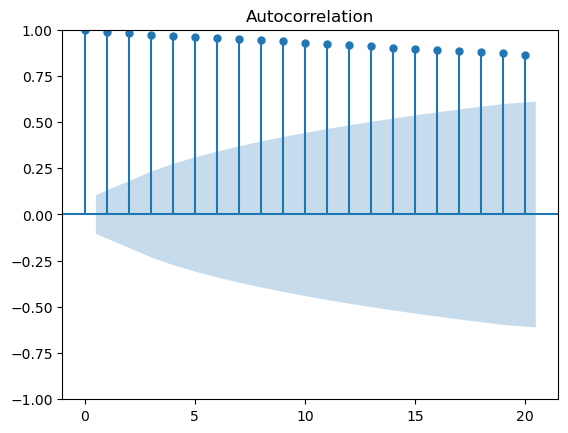

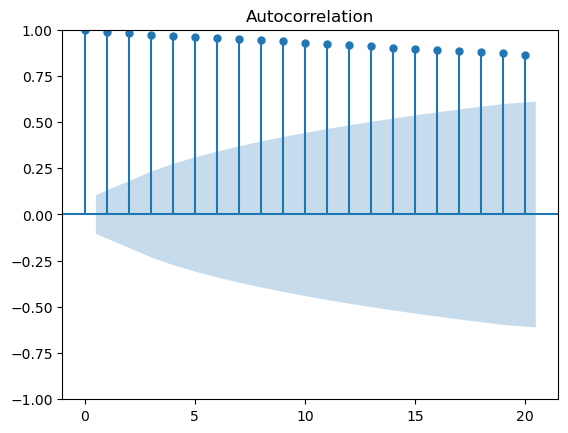

In [26]:
plot_acf(sub_interval_df['prices'],lags=20)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

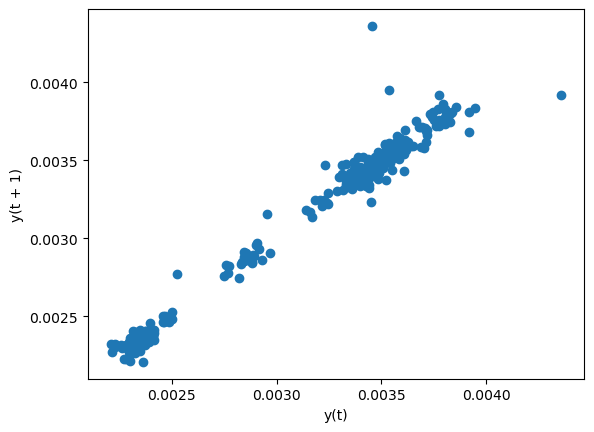

In [27]:
lag_plot(sub_interval_df['prices'])

In [28]:
before = sub_interval_df.groupby('before_after')['prices'].get_group(0)

In [29]:
model = AutoReg(before, 2)

In [30]:
model_fit = model.fit()

In [31]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 prices   No. Observations:                  174
Model:                     AutoReg(2)   Log Likelihood                1494.447
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Tue, 20 Dec 2022   AIC                          -2980.893
Time:                        08:13:21   BIC                          -2968.303
Sample:                             2   HQIC                         -2975.785
                                  174                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.795e-05   3.25e-05     -1.783      0.075      -0.000    5.76e-06
prices.L1      0.7215      0.073      9.880      0.000       0.578       0.865
prices.L2      0.3047      0.075      4.043      0.000       0.157       0.452
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9803           +0.0000j            0.9803            0.0000
AR.2           -3.3483           +0.0000j            3.3483            0.5000
-----------------------------------------------------------------------------
"""

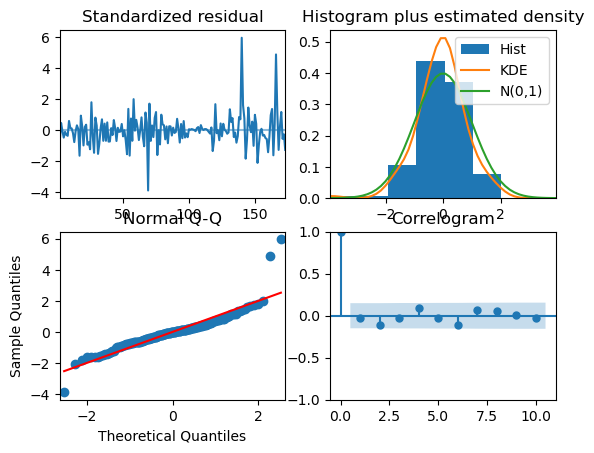

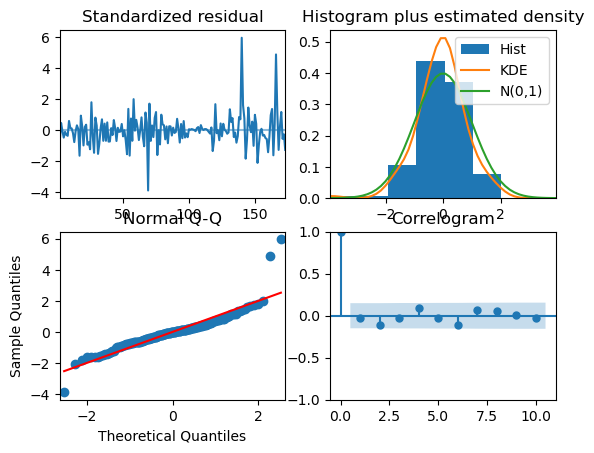

In [32]:
model_fit.plot_diagnostics()

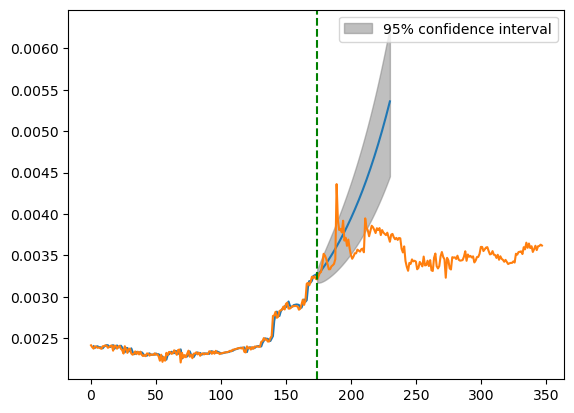

In [33]:
model_fit.plot_predict(0,230)
plt.plot(sub_interval_df['prices'])
plt.axvline(174,color='green',linestyle='--')

In [34]:
sub_interval_df.head()

,prices,market_caps,total_volumes,timestamps,date,before_after,days_since_tweet,min_max_prices
0,0.002414,2.781948e+08,5.878091e+06,1531274641822,2018-07-11 02:04:01.822,0,-6.995822,0.104097
1,0.002390,2.754051e+08,5.814493e+06,1531278243619,2018-07-11 03:04:03.619,0,-6.954132,0.095329
2,0.002374,2.735420e+08,5.769283e+06,1531281843634,2018-07-11 04:04:03.634,0,-6.912465,0.089473
3,0.002402,2.768033e+08,5.878266e+06,1531285435984,2018-07-11 05:03:55.984,0,-6.870891,0.099723
4,0.002397,2.761497e+08,5.712269e+06,1531289038750,2018-07-11 06:03:58.750,0,-6.829190,0.097669


In [35]:
rdd_model = ols('min_max_prices ~ days_since_tweet * before_after',sub_interval_df).fit()

In [36]:
rdd_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         min_max_prices   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1219.
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          7.47e-183
Time:                        08:13:22   Log-Likelihood:                 477.50
No. Observations:                 348   AIC:                            -947.0
Df Residuals:                     344   BIC:                            -931.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.2305      0.009     24.740      0.000       0.212       0.249
days_since_tweet                  0.0308      0.002     13.461      0.000       0.026       0.035
before_after                      0.3013      0.013     23.005      0.000       0.276       0.327
days_since_tweet:before_after    -0.0366      0.003    -11.290      0.000      -0.043      -0.030
==============================================================================
Omnibus:                       27.914   Durbin-Watson:                   0.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.828
Skew:                           0.677   Prob(JB):                     7.44e-08
Kurtosis:                       3.654   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

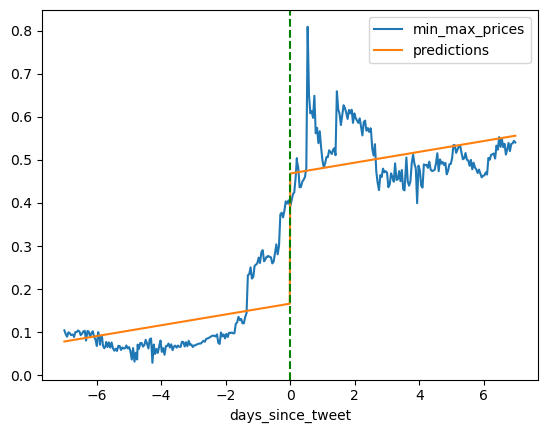

In [37]:
new_rdd_model = ols('min_max_prices ~ days_since_tweet + before_after',sub_interval_df).fit()
ax = sub_interval_df.plot(y='min_max_prices',x='days_since_tweet')
sub_interval_df.assign(predictions=new_rdd_model.fittedvalues).plot(x='days_since_tweet',y='predictions',ax=ax,color='C1')
plt.axvline(0,color='green',linestyle='--')

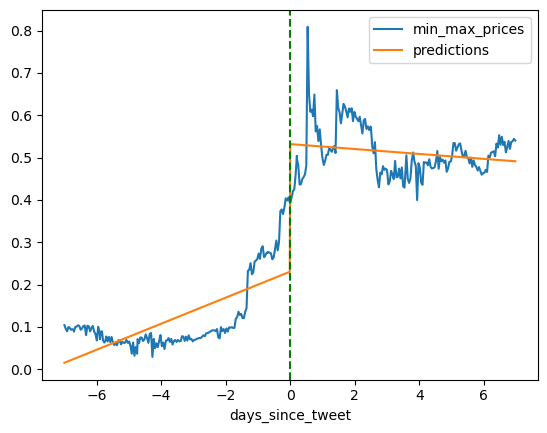

In [38]:
ax = sub_interval_df.plot(y='min_max_prices',x='days_since_tweet')
sub_interval_df.assign(predictions=rdd_model.fittedvalues).plot(x='days_since_tweet',y='predictions',ax=ax,color='C1')
plt.axvline(0,color='green',linestyle='--')

In [39]:
def multiple_window_models(range_of_windows):
    models = []
    names = []
    for window in range_of_windows:
        window_df = df[(df['days_since_tweet'] > -window) & (df['days_since_tweet'] < window)].reset_index()
        model = ols('min_max_prices ~ days_since_tweet * before_after',window_df).fit()
        models.append(model)
        names.append('± ' + str(window) + ' Days')
    return models,names

In [40]:
window=3
window_df = df[(df['days_since_tweet'] > -window) & (df['days_since_tweet'] < window)].reset_index()
model = ols('min_max_prices ~ days_since_tweet * before_after',window_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         min_max_prices   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     538.5
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.03e-78
Time:                        08:13:23   Log-Likelihood:                 216.47
No. Observations:                 150   AIC:                            -424.9
Df Residuals:                     146   BIC:                            -412.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.3590      0.013     26.946      0.000       0.333       0.385
days_since_tweet                  0.1165      0.008     14.963      0.000       0.101       0.132
before_after                      0.1571      0.019      8.460      0.000       0.120       0.194
days_since_tweet:before_after    -0.1007      0.011     -9.277      0.000      -0.122      -0.079
==============================================================================
Omnibus:                       24.218   Durbin-Watson:                   0.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.573
Skew:                           0.615   Prob(JB):                     2.59e-14
Kurtosis:                       5.915   Cond. No.                         9.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
def multi_regression_table(models,names):
    return summary_col(
        models,
        stars=True,
        float_format='%0.3f',
        model_names=names,
        info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))})

In [43]:
models, names = multiple_window_models(range(1,14))
table = multi_regression_table(models,names)
table

,± 1 Days,± 2 Days,± 3 Days,± 4 Days,± 5 Days,± 6 Days,± 7 Days,± 8 Days,± 9 Days,± 10 Days,± 11 Days,± 12 Days,± 13 Days
Intercept,0.392***,0.396***,0.359***,0.321***,0.288***,0.258***,0.230***,0.205***,0.180***,0.162***,0.152***,0.145***,0.139***
,(0.023),(0.015),(0.013),(0.012),(0.011),(0.010),(0.009),(0.009),(0.009),(0.008),(0.008),(0.007),(0.007)
days_since_tweet,0.159***,0.161***,0.117***,0.083***,0.060***,0.043***,0.031***,0.021***,0.012***,0.006***,0.003***,0.001,-0.000
,(0.039),(0.013),(0.008),(0.005),(0.004),(0.003),(0.002),(0.002),(0.002),(0.001),(0.001),(0.001),(0.001)
before_after,0.026,0.069***,0.157***,0.228***,0.261***,0.285***,0.301***,0.328***,0.350***,0.373***,0.383***,0.393***,0.404***
,(0.031),(0.020),(0.019),(0.017),(0.015),(0.014),(0.013),(0.013),(0.012),(0.012),(0.011),(0.010),(0.009)
days_since_tweet:before_after,0.057,-0.082***,-0.101***,-0.097***,-0.074***,-0.054***,-0.037***,-0.028***,-0.018***,-0.013***,-0.010***,-0.009***,-0.009***
,(0.055),(0.018),(0.011),(0.007),(0.005),(0.004),(0.003),(0.003),(0.002),(0.002),(0.002),(0.001),(0.001)
R-squared,0.821,0.917,0.917,0.912,0.918,0.918,0.914,0.908,0.897,0.891,0.893,0.895,0.895
R-squared Adj.,0.810,0.915,0.915,0.911,0.917,0.918,0.913,0.907,0.897,0.890,0.892,0.895,0.895


In [44]:
def perform_placebo(window_size,original_df):
    sample_from = original_df['date'][0] + dt.timedelta(days=window_size)
    sample_to = original_df['date'][len(original_df.index)-1] - dt.timedelta(days=window_size)
    sampling_df = original_df[(original_df['date'] >= sample_from) & (original_df['date'] <= sample_to)].copy()
    random_tweet = sampling_df.sample()
    random_tweet_date = original_df['date'][random_tweet.index.values.tolist()[0]]
    days_since_random_tweet_mapper = gen_days_since(random_tweet_date)
    sampling_df['days_since_tweet']=sampling_df['date'].map(days_since_random_tweet_mapper)
    is_after_random_tweet = is_after_tweet(random_tweet_date)
    sampling_df['before_after']=sampling_df['date'].map(is_after_random_tweet)
    windowed_df = sampling_df[(sampling_df['days_since_tweet'] >= -window_size)&(sampling_df['days_since_tweet'] <= window_size)]
    return ols('prices ~ days_since_tweet * before_after',windowed_df).fit()
    

In [45]:
placebo = perform_placebo(7,df)

In [46]:
placebo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 prices   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     327.0
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          1.28e-100
Time:                        08:13:56   Log-Likelihood:                 2893.2
No. Observations:                 350   AIC:                            -5778.
Df Residuals:                     346   BIC:                            -5763.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.0026   9.58e-06    276.452      0.000       0.003       0.003
days_since_tweet               1.927e-05   2.38e-06      8.103      0.000    1.46e-05    2.39e-05
before_after                   2.373e-05   1.36e-05      1.745      0.082   -3.02e-06    5.05e-05
days_since_tweet:before_after -7.812e-05   3.36e-06    -23.219      0.000   -8.47e-05   -7.15e-05
==============================================================================
Omnibus:                       17.815   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.660
Skew:                           0.579   Prob(JB):                     5.38e-05
Kurtosis:                       2.929   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""